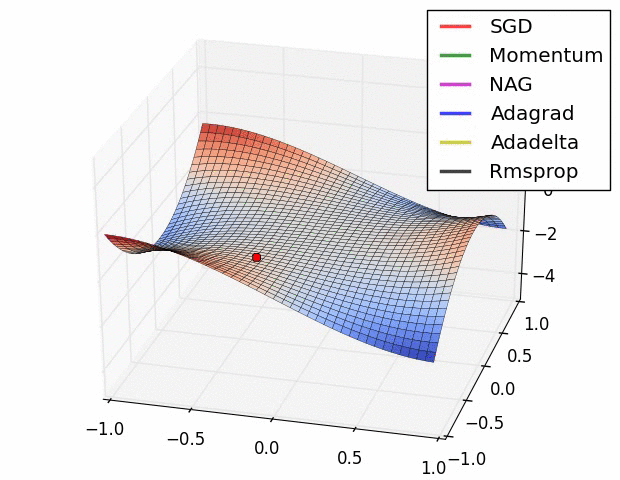

## Adagrad
Adagrad(Adaptive Gradient) 최적화 알고리즘은 손실 함수(loss function)의 값을 최소로 만드는 최적의 가중치를 찾아내기 위해 learning rate를 조절해 하강하는 방법 중 하나입니다.

기존 방식이 가중치들의 업데이트를 같은 속도로 한꺼번에 하는 방법이었다면, Adagrad는 가중치 각각의 업데이트 속도를 데이터에 맞추어(adaptively) 계산해 적절한 learning rate로 하강하도록 합니다.

- tf.keras.optimizers.Adagrad(lr, epsilon, decay) :
    - lr : 학습률 (learning rate) (lr >= 0), 기본값 0.1
    - epsilon : 연산 시 분모가 0이 되는 것을 막는, 0에 가까운 상수 (epsilon >= 0), 기본값 0.000001
    - decay : 업데이트마다 학습률을 비율만큼 줄여주는 파라미터 (decay >= 0), 기본값 0.0

## RMSprop
RMSprop 최적화 알고리즘은 학습이 진행될수록 가중치 업데이트 강도가 약해지는 Adagrad의 단점을 보완하고자 제안된 방법입니다.

RMSProp은 과거의 gradient 값은 잊고 새로운 gradient 값을 크게 반영해서 가중치를 업데이트합니다.

- tf.keras.optimizers.RMSprop(lr) :
    - lr : 학습률, 기본값 0.1
    
## Adam
Adam은 최적화 알고리즘 중 가장 발전된 기법입니다. RMSProp과 모멘텀(momentum)을 함께 사용함으로써, 진행 방향과 learning rate 모두를 적절하게 유지하면서 학습할 수 있도록 고안되었습니다.

- tf.keras.optimizers.Adam(lr, beta_1, beta_2) :
    - lr : 학습률, 기본값 0.01
    - beta_1 : 모멘텀을 결정하기 위해 사용하는 파라미터 (beta_1 >= 0 ), 기본값 0.9
    - beta_2 : step size를 결정하기 위해 사용하는 파라미터 (beta_2 >= 0), 기본값 0.999
    
    
    
일반적으로 Adam의 성능이 제일 좋고, 그 다음 RMSProp, Adagrad 순으로 성능이 좋다고 알려져 있습니다.

그러나 데이터셋의 종류, epochs나 batch_size 같은 하이퍼 파라미터의 값 등등에 따라 최적화 알고리즘의 성능은 이론과 완전히 같지 않을 수 있습니다.


In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    
    return results

'''
1. Adagrad, RMSprop, Adam 최적화 알고리즘을 적용할 하나의 모델을 자유롭게 생성합니다.
'''

def OPT_model(word_num):
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape = (word_num,), activation='relu'),
                                tf.keras.layers.Dense(32, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')])
    
    return model

'''
2. 세 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

손실 함수(loss) : ‘binary_crossentropy’
평가 방법(metrics): [‘accuracy’, ‘binary_crossentropy’]
단, 최적화 알고리즘은 각각의 모델에 대해 adagrad_opt, rmsprop_opt, adam_opt를 위 설명과 같이 정의하고, 변수는 아래와 똑같이 설정하여 사용합니다.

Adagrad: lr = 0.01, epsilon = 0.00001, decay = 0.4
RMSProp: lr = 0.001
Adam: lr = 0.01, beta_1 = 0.9, beta_2 = 0.999

   Step01. OPT_model 함수를 이용해 세 모델을 불러옵니다. 
           모두 동일한 모델입니다.
   
   Step02. 세 모델의 손실 함수, 최적화 방법, 
           평가 방법을 설정합니다.
   
   Step03. 세 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 세 모델을 각각 학습시킵니다. 
           세 모델 모두 'epochs'는 20, 'batch_size'는
           500으로 설정합니다.
   
   Step05. 세 모델을 테스트하고 
           binary crossentropy 점수를 출력합니다. 
           셋 중 어느 모델의 성능이 가장 좋은지 확인해보세요.
'''

def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)
    
    adagrad_model = OPT_model(word_num)  # Adagrad를 사용할 모델입니다.
    rmsprop_model = OPT_model(word_num)  # RMSProp을 사용할 모델입니다.
    adam_model = OPT_model(word_num)     # Adam을 사용할 모델입니다.
    
    adagrad_opt = tf.keras.optimizers.Adagrad(lr = 0.01, epsilon = 0.00001, decay = 0.4)
    adagrad_model.compile(loss = 'binary_crossentropy', optimizer = adagrad_opt, metrics = ['accuracy', 'binary_crossentropy'])
    
    rmsprop_opt = tf.keras.optimizers.RMSprop(lr = 0.001)
    rmsprop_model.compile(loss = 'binary_crossentropy', optimizer = rmsprop_opt, metrics = ['accuracy', 'binary_crossentropy'])
    
    adam_opt = tf.keras.optimizers.Adam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999)
    adam_model.compile(loss = 'binary_crossentropy', optimizer = adam_opt, metrics = ['accuracy', 'binary_crossentropy'])
    
    adagrad_model.summary()
    rmsprop_model.summary()
    adam_model.summary()
    
    adagrad_history = adagrad_model.fit(train_data, train_labels, epochs = 20, batch_size = 500, validation_data = (test_data, test_labels), verbose = 0)
    print('\n')
    rmsprop_history = rmsprop_model.fit(train_data, train_labels, epochs = 20, batch_size = 500, validation_data = (test_data, test_labels), verbose = 0)
    print('\n')
    adam_history = adam_model.fit(train_data, train_labels, epochs = 20, batch_size = 500, validation_data = (test_data, test_labels), verbose = 0)
    
    scores_adagrad = adagrad_model.evaluate(test_data, test_labels, verbose = 0)
    scores_rmsprop = rmsprop_model.evaluate(test_data, test_labels, verbose = 0)
    scores_adam = adam_model.evaluate(test_data, test_labels, verbose = 0)
    
    print('\nscores_adagrad: ', scores_adagrad[-1])
    print('scores_rmsprop: ', scores_rmsprop[-1])
    print('scores_adam: ', scores_adam[-1])
    
    Visulaize([('Adagrad', adagrad_history),('RMSprop', rmsprop_history),('Adam', adam_history)])
    
    return adagrad_history, rmsprop_history, adam_history
    
if __name__ == "__main__":
    main()

In [1]:
'''
ouput

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
=================================================================
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_3 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
=================================================================
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_6 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
=================================================================
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________





scores_adagrad:  0.6978411
scores_rmsprop:  0.5688486
scores_adam:  0.58845776
'''

'\nouput\n\nModel: "sequential"\n_________________________________________________________________\nLayer (type)                 Output Shape              Param #   \n=================================================================\ndense (Dense)                (None, 32)                3232      \n_________________________________________________________________\ndense_1 (Dense)              (None, 32)                1056      \n_________________________________________________________________\ndense_2 (Dense)              (None, 1)                 33        \n=================================================================\nTotal params: 4,321\nTrainable params: 4,321\nNon-trainable params: 0\n_________________________________________________________________\nModel: "sequential_1"\n_________________________________________________________________\nLayer (type)                 Output Shape              Param #   \n=================================================================\nde

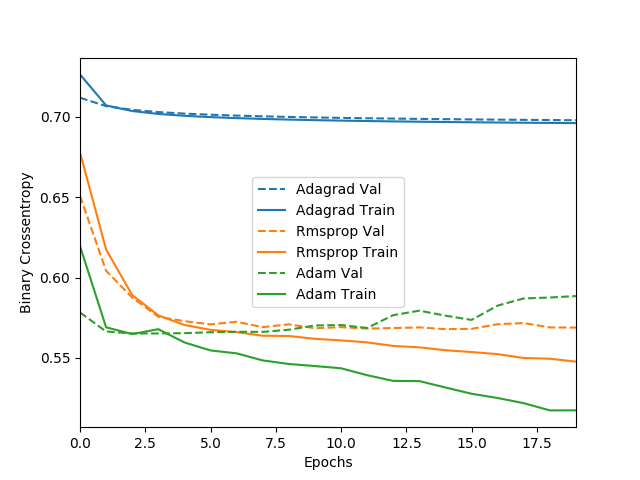